In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# I. LOAD DATA

In [3]:
train = pd.read_csv('./Data/train_clean.csv') 

In [4]:
train.head()

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice,Neighborhood_Grp,hasBsmt,hasGarage
0,0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5,2.5,1,12.247694,good,Basement,Garage
1,1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31,2.0,1,12.109011,affluent,Basement,Garage
2,2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6,2.5,1,12.317167,good,Basement,Garage
3,3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36,1.0,1,11.849398,affluent,Basement,Garage
4,4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8,2.5,1,12.429216,affluent,Basement,Garage


In [5]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('index', axis=1)

In [6]:
# Ensure these variabes are categorical
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)

In [7]:
train.shape[0]

1441

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice,Neighborhood_Grp,hasBsmt,hasGarage
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5,2.5,1,12.247694,good,Basement,Garage
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31,2.0,1,12.109011,affluent,Basement,Garage
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6,2.5,1,12.317167,good,Basement,Garage
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36,1.0,1,11.849398,affluent,Basement,Garage
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8,2.5,1,12.429216,affluent,Basement,Garage


## The Variables

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist_all = list(num_train)
print(len(numlist_all),' numerical variables')
print(list(numlist_all))

33  numerical variables
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt', 'log_SalePrice']


In [10]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist_all = list(cat_train)
print(len(catlist_all),' categorical variables')
print(catlist_all)

49  categorical variables
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Neighborhood_Grp', 'hasBsmt', 'hasGarage']


# II. Preprocessing 

#### 1. Separate the input and output variable(s): create new dataframes

In [11]:
# Remove 'SalePrice' and 'Id' from the numlist
numlist_all.remove('SalePrice')
numlist_all.remove('log_SalePrice')
numlist_all.remove('Id')

In [12]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

numlist = list()
corr_thrshld = 0.15

for nvar in numlist_all:
       
    r = ma.corrcoef(ma.masked_invalid(train[nvar]), 
                ma.masked_invalid(train['log_SalePrice']))

    if np.abs(r[0,1]) >= corr_thrshld:
        
        numlist.append(nvar)

print('Original list had ', len(numlist_all),' numerical variables')
print('Reduced list has ', len(numlist),' numerical variables \n')
print(numlist)

Original list had  30  numerical variables
Reduced list has  22  numerical variables 

['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt']


In [13]:
# Remove similar Numerical variables
# numlist.remove('Var')

In [14]:
#numlist = ['OverallQual','GrLivArea',
#           'TotalBsmtSF','Num_Bathrms_AbvGrd',
#           'GarageCars','AgeHome'] # testing

In [15]:
# Let's reduce the list of categorical variables
# For each variable, running an anova to determine 
      # if there is a significant difference in mean SalePrice 
      #  between the differenct options of the given variable
        
import statsmodels.api as sm
from statsmodels.formula.api import ols

catlist = list()

for cvar in catlist_all: 
    # Group Difference
    mstr = 'SalePrice ~ ' + cvar
    mod = ols(mstr,data=train).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    eff_size_temp = (aov_table['sum_sq'][0])/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    
    if aov_table['PR(>F)'][0] <= 0.01 and eff_size_temp > 0.059:
        catlist.append(cvar)

print('Original list had ', len(catlist_all),' categorical variables')
print('Reduced list has ', len(catlist),' categorical variables \n')
print(catlist)

Original list had  49  categorical variables
Reduced list has  27  categorical variables 

['MSSubClass', 'MSZoning', 'LotShape', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'Neighborhood_Grp', 'hasGarage']


In [16]:
# Remove similar Categorical variables
catlist.remove('Neighborhood')

In [17]:
#catlist = ['Neighborhood', 
#          'CentralAir'] # testing

In [18]:
# CONCATENATE!! the numerical and categorical
inputs_vars = numlist + catlist
print(inputs_vars)

['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt', 'MSSubClass', 'MSZoning', 'LotShape', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'Neighborhood_Grp', 'hasGarage']


In [19]:
PriceFeatures = train[inputs_vars].copy()

In [20]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,MSSubClass,MSZoning,LotShape,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition,Neighborhood_Grp,hasGarage
0,65.0,8450,7,196.0,706,150,856,856,854,1710,3,1,8,0,2,548,0,61,5,5,2.5,1,60,RL,Reg,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Y,SBrkr,Gd,NoFirePlace,Attchd,RFn,TA,TA,WD,Normal,good,Garage
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,3,1,6,1,2,460,298,0,31,31,2.0,1,20,RL,Reg,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,TA,WD,Normal,affluent,Garage
2,68.0,11250,7,162.0,486,434,920,920,866,1786,3,1,6,1,2,608,0,42,7,6,2.5,1,60,RL,IR1,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,WD,Normal,good,Garage
3,60.0,9550,7,0.0,216,540,756,961,756,1717,3,1,7,1,3,642,0,35,91,36,1.0,1,70,RL,IR1,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Y,SBrkr,Gd,Gd,Detchd,Unf,TA,TA,WD,Abnorml,affluent,Garage
4,84.0,14260,8,350.0,655,490,1145,1145,1053,2198,4,1,9,1,3,836,192,84,8,8,2.5,1,60,RL,IR1,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,WD,Normal,affluent,Garage


##### Which Columns Are Numeric? Need this information later.

In [21]:
nlist = list(PriceFeatures.select_dtypes('number'))
print('Numerical Column Names: \n', nlist)

num_indx = []
for nvar in nlist:
    num_indx.append(PriceFeatures.select_dtypes('number').columns.get_loc(nvar))
    
print('\nNumerical Columns Indices: \n', num_indx)

Numerical Column Names: 
 ['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt']

Numerical Columns Indices: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


##### The Dependent Variable 🎯

In [22]:
Price = train['SalePrice']

In [23]:
log_Price = train['log_SalePrice']

SalePrice is right skewed (left plot).
For the output/dependent variable, the log of SalePrice taken.
This is so the residuals of a linear model would be normal.


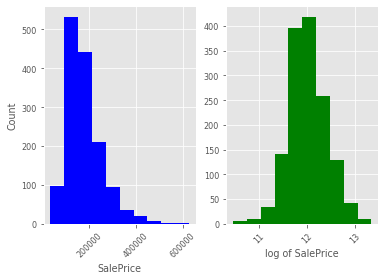

In [24]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(Price,color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
    
axs[1].hist(log_Price,color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')
print('SalePrice is right skewed (left plot).')
print('For the output/dependent variable, the log of SalePrice taken.')
print('This is so the residuals of a linear model would be normal.')

#### 2. Dummify the Categorical Variables

In [25]:
#train.groupby(['Neighborhood'])['log_SalePrice'].median().sort_values(ascending=False).reset_index()

In [26]:
catlist

['MSSubClass',
 'MSZoning',
 'LotShape',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SaleCondition',
 'Neighborhood_Grp',
 'hasGarage']

In [27]:
special_list = ['MSZoning', 'Neighborhood_Grp', 'LotShape', 'HouseStyle', 'ExterQual', 
               'BsmtQual','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu',
               'GarageType','GarageQual','GarageCond','SaleType']
special_ref = ['C (all)', 'affordable', 'IR3', 'SLvl', 'Fa', 
               'Fa','No','Po','Fa','Po','Detchd','Po', 'Po', 'Oth']

In [28]:
print('For each variable, Reference Categories:')
cref = []
for cvar in catlist:
    MedianSalePrices = train.groupby([cvar])['log_SalePrice'].median().sort_values(ascending=False).reset_index()

    if cvar not in special_list:
        if len(train[cvar].unique()) > 2: 
            med_temp = MedianSalePrices.iloc[:,1].median()
            diff_temp = list(np.abs(MedianSalePrices.iloc[:,1] - med_temp))
            the_index = diff_temp.index(min(diff_temp))

        else:
            med_list = list(MedianSalePrices.iloc[:,1])
            the_index = med_list.index(min(med_list))
                
        cref.append(MedianSalePrices.loc[the_index,cvar])  
    else:
        cindx = np.where(np.array(special_list) == cvar)[0][0]
        cref.append(special_ref[cindx]) 
    
print(cref)

For each variable, Reference Categories:
['85', 'C (all)', 'IR3', 'SLvl', 'Mansard', 'Stucco', 'HdBoard', 'BrkFace', 'Fa', 'Stone', 'Fa', 'No', 'Rec', 'Po', 'N', 'FuseF', 'Fa', 'Po', 'Detchd', 'RFn', 'Po', 'Po', 'Oth', 'Alloca', 'affordable', 'NoGarage']


In [29]:
col_2_dummy = catlist
PriceFeatures = pd.get_dummies(PriceFeatures, 
                               columns=col_2_dummy) # removed drop_first=True

In [30]:
PriceFeatures.shape[1]

187

In [31]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Grp_affluent,Neighborhood_Grp_affordable,Neighborhood_Grp_average,Neighborhood_Grp_good,hasGarage_Garage,hasGarage_NoGarage
0,65.0,8450,7,196.0,706,150,856,856,854,1710,3,1,8,0,2,548,0,61,5,5,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,3,1,6,1,2,460,298,0,31,31,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,68.0,11250,7,162.0,486,434,920,920,866,1786,3,1,6,1,2,608,0,42,7,6,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [32]:
# Drop reference columns 
cnt = 0
for cvar in catlist:
    print('dropping: ',cvar + '_' + cref[cnt])
    PriceFeatures = PriceFeatures.drop((cvar + '_' + cref[cnt]), axis=1)
    cnt +=1

dropping:  MSSubClass_85
dropping:  MSZoning_C (all)
dropping:  LotShape_IR3
dropping:  HouseStyle_SLvl
dropping:  RoofStyle_Mansard
dropping:  Exterior1st_Stucco
dropping:  Exterior2nd_HdBoard
dropping:  MasVnrType_BrkFace
dropping:  ExterQual_Fa
dropping:  Foundation_Stone
dropping:  BsmtQual_Fa
dropping:  BsmtExposure_No
dropping:  BsmtFinType1_Rec
dropping:  HeatingQC_Po
dropping:  CentralAir_N
dropping:  Electrical_FuseF
dropping:  KitchenQual_Fa
dropping:  FireplaceQu_Po
dropping:  GarageType_Detchd
dropping:  GarageFinish_RFn
dropping:  GarageQual_Po
dropping:  GarageCond_Po
dropping:  SaleType_Oth
dropping:  SaleCondition_Alloca
dropping:  Neighborhood_Grp_affordable
dropping:  hasGarage_NoGarage


In [33]:
PriceFeatures.shape[1]

161

In [34]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NoBsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Grp_affluent,Neighborhood_Grp_average,Neighborhood_Grp_good,hasGarage_Garage
0,65.0,8450,7,196.0,706,150,856,856,854,1710,3,1,8,0,2,548,0,61,5,5,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,3,1,6,1,2,460,298,0,31,31,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
2,68.0,11250,7,162.0,486,434,920,920,866,1786,3,1,6,1,2,608,0,42,7,6,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3,60.0,9550,7,0.0,216,540,756,961,756,1717,3,1,7,1,3,642,0,35,91,36,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,84.0,1426

#### 3. Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, log_Price, test_size=0.2, 
    random_state=0)

In [36]:
X_train.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NoBsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Grp_affluent,Neighborhood_Grp_average,Neighborhood_Grp_good,hasGarage_Garage
482,80.0,9600,5,0.0,607,506,1113,1113,0,1113,3,1,5,1,1,264,0,80,59,2,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
1050,41.0,4920,8,0.0,616,722,1338,1338,0,1338,2,1,6,0,2,582,0,0,9,9,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
670,52.0,9022,5,0.0,0,768,768,792,0,792,2,1,5,0,1,240,316,0,85,3,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1239,68.0,17542,7,0.0,125,36,1192,1516,651,2167,3,1,9,2,2,518,220,47,33,4,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
530,74.0,

#### 4. Standardize the numerical variables

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

t = [('num', StandardScaler(), num_indx)]
transf = ColumnTransformer(transformers=t,
                           remainder='passthrough')

In [38]:
num_indx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [39]:
X_train_scaled = transf.fit_transform(X_train)
X_test_scaled = transf.transform(X_test)

In [40]:
X_train_scaled.shape

(1152, 161)

<ipython-input-41-3f0e3c5f6e20>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


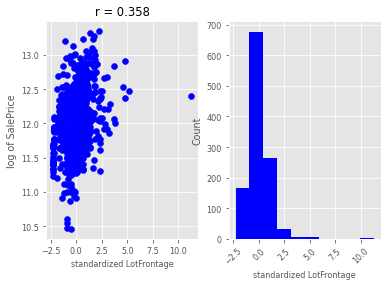

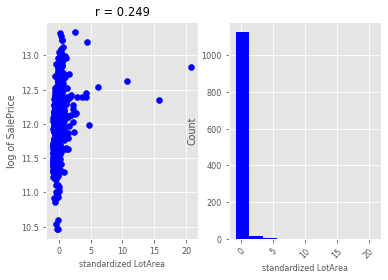

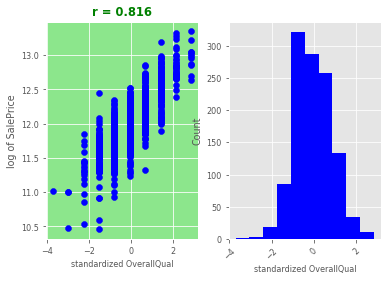

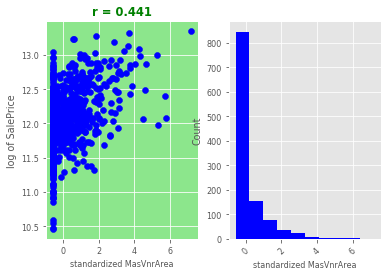

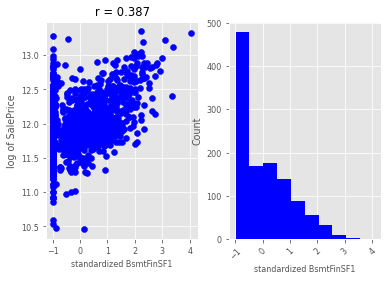

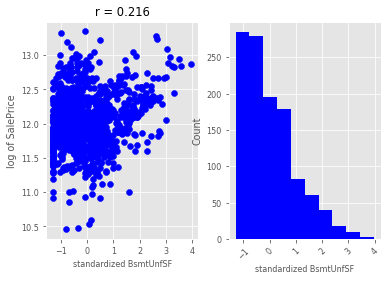

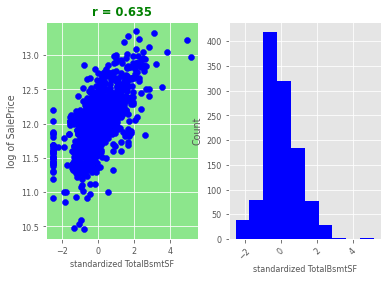

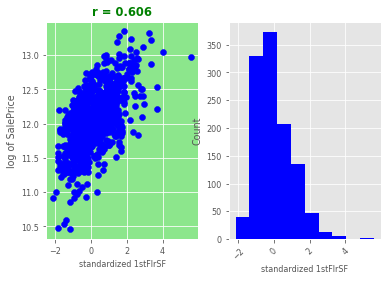

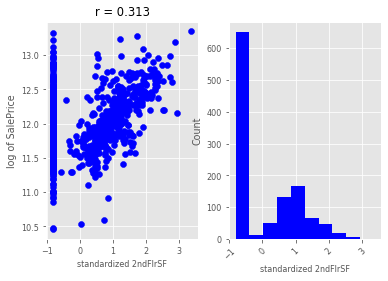

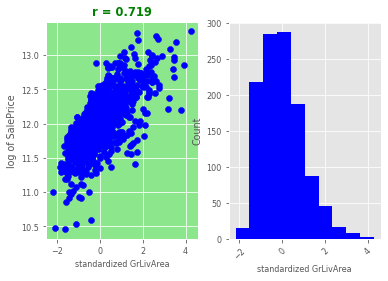

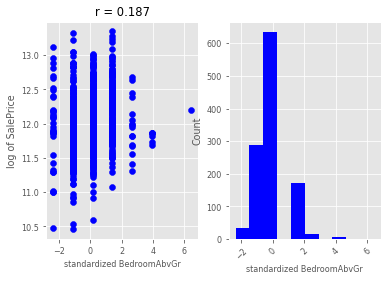

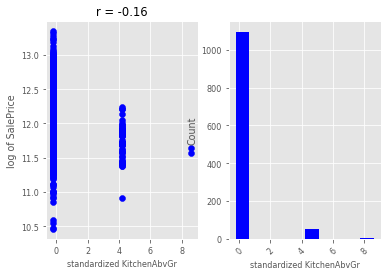

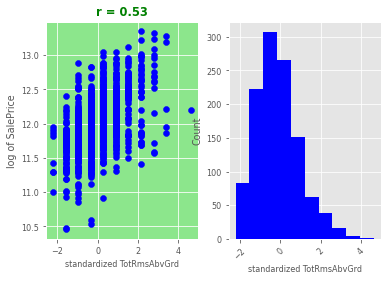

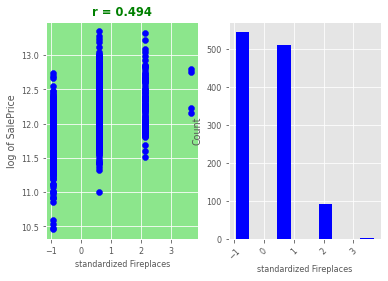

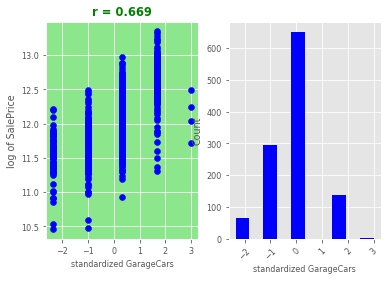

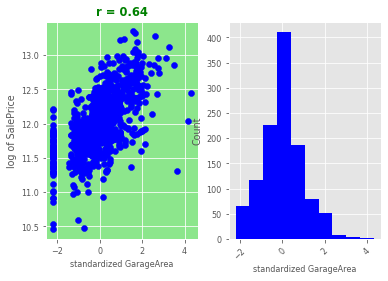

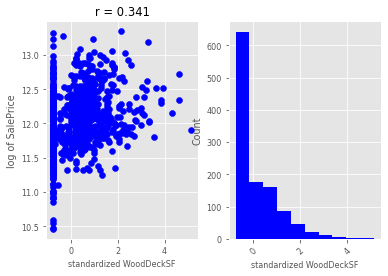

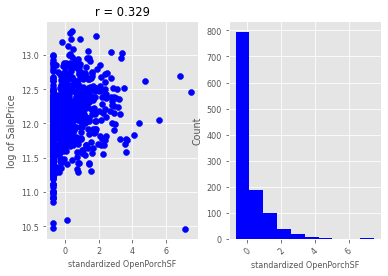

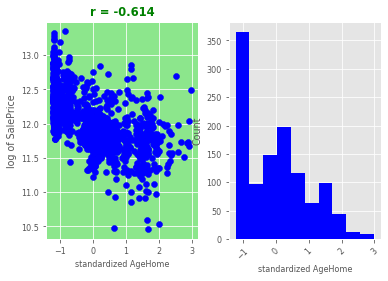

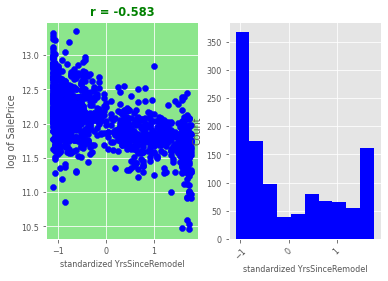

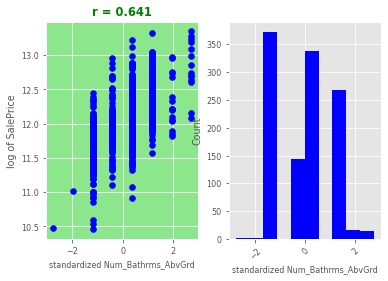

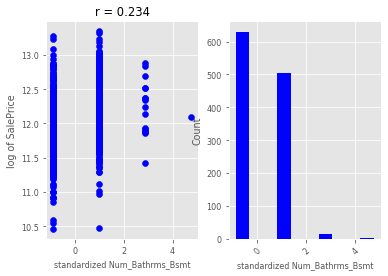

In [41]:
# plotting the standardized numerical variables vs.
     # log of SalePrice
    
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.4

fcnt = 0
for Feat in X_train.columns[num_indx]:
    fig, axs = plt.subplots(1,2) 
    x = X_train_scaled[:,fcnt]
    y = y_train
    
    axs[0].scatter(x,y,color='b')
    axs[0].set_xlabel('standardized ' + Feat,fontsize = 8)
    axs[0].set_ylabel('log of SalePrice')
    fcnt +=1
    
    r = ma.corrcoef(ma.masked_invalid(x), 
                ma.masked_invalid(y))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        
    
    # Histogram
    axs[1].hist(x,color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('standardized ' + Feat,fontsize = 8)

In [42]:
# # How many Missing Values?
# PriceFeatures.isna().sum()

# III. Train Models

My Functions

In [43]:
def get_residuals(model, X, Y):
    
    residuals = Y - model.predict(X)
    
    return residuals

In [44]:
def model_evaluate(model, X, Y):
    import numpy as np
    from sklearn.metrics import mean_squared_error, r2_score

    rmse = mean_squared_error(Y, 
                            model.predict(X), 
                            squared = False)
    r2 = r2_score(Y, model.predict(X))
    
    if len(np.where(model.predict(X)>20)[0]) > 0: # specific to this dataset
        # Issue, model prediction is too large
        rmse_dollars = np.nan
    else:
        rmse_dollars = mean_squared_error(np.exp(Y), 
                            np.exp(model.predict(X)), 
                            squared = False)

    print('RMSE Logarithmic: ', rmse)
    print('r^2: ', r2)
    print('RMSE: $', rmse_dollars)
    
    return rmse, r2, rmse_dollars

In [45]:
def plot_the_model(model, x_train, y_train, x_test, y_test):
    import numpy as np
    from matplotlib import pyplot as plt

    fig, axs = plt.subplots(1,2) 
    fig.set_figheight(5)
    fig.set_figwidth(10)

    x = np.linspace(10, 14.5, 100)
    y = np.linspace(10, 14.5, 100)
    
    # --------------------------------
    # Plot the Actual vs. Predicted
    # --------------------------------
    axs[0].scatter(model.predict(x_train), 
         y_train, color='k')
    axs[0].plot(x,y, 'r-')
 
    axs[0].set_ylabel('Actual log of Sale Price')
    axs[0].set_xlabel('Predicted log of Sale Price')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].legend(['line','Train'])
    
    axs[1].scatter(model.predict(x_test), 
         y_test, color='magenta') 
    axs[1].plot(x,y, 'r-')

    axs[1].set_ylabel('Actual log of Sale Price')
    axs[1].set_xlabel('Predicted log of Sale Price')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].legend(['line','Test'])

In [46]:
def get_linear_regress_model(X, Y):
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    
    model = lm.fit(X, Y)
    print('LM model object created.')
    
    return model

In [47]:
def get_lasso_model(X, Y):
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold

    skfold = KFold(n_splits=3, shuffle=True, random_state=0)
    lasso_gs  = Lasso()
    lasso_gs.set_params(normalize=False)

    params = {
        "alpha": [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
    }

    gs = GridSearchCV(lasso_gs, params, scoring = 'r2', cv=skfold)
    gs.fit(X, Y)
    
    model = gs.best_estimator_
    
    print('Lasso model object created.')
    print(gs.best_estimator_)
    
    return model

In [48]:
def get_ridge_model(X, Y):
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold

    skfold = KFold(n_splits=3, shuffle=True, random_state=0)
    ridge_gs  = Ridge()
    ridge_gs.set_params(normalize=False)

    params = {
        "alpha": [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
    }

    gs = GridSearchCV(ridge_gs, params, scoring = 'r2', cv=skfold)
    gs.fit(X, Y)
    
    model = gs.best_estimator_
    
    print('Ridge model object created.')
    print(gs.best_estimator_)
    
    return model

In [49]:
def get_elasticNet_model(X, Y):
    from sklearn.linear_model import ElasticNet
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold

    skfold = KFold(n_splits=3, shuffle=True, random_state=0)
    elastic_gs  = ElasticNet()
    elastic_gs.set_params(normalize=False)

    params = [{
        "alpha": [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01],
        "l1_ratio":[0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
    }]

    gs = GridSearchCV(elastic_gs, params, scoring = 'r2', cv=skfold)
    gs.fit(X_train_scaled, y_train)
    
    model = gs.best_estimator_
    
    print('Elastic Net model object created.')
    print(gs.best_estimator_)
    
    return model

In [50]:
# initializing these variables for model comparision
model_descrp = []
r2_log_train = []
r2_log_test = []
rmse_log_train = []
rmse_log_test = []
rmse_dollars_train = []
rmse_dollars_test = []

In [51]:
# I found myself copying this text over and over, 
# so, I created a function for it

def append_myMetrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars):
    
    r2_log_train_temp = r2_train
    r2_log_test_temp = r2_test
    rmse_log_train_temp = rmse_train
    rmse_log_test_temp = rmse_test
    rmse_dollars_train_temp = rmse_train_dollars
    rmse_dollars_test_temp = rmse_test_dollars

    model_descrp.append(which_model)
    if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
        r2_log_train.append(r2_log_train_temp)
    elif r2_log_train_temp > 1:   
        r2_log_train.append(1000)
    else:
        r2_log_train.append(-1000)

    if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
        r2_log_test.append(r2_log_test_temp)
    elif r2_log_test_temp > 1:   
        r2_log_test.append(1000)
    else:
        r2_log_test.append(-1000)
    
    if rmse_log_train_temp <= 10:
        rmse_log_train.append(rmse_log_train_temp)
    elif rmse_log_train_temp > 10:   
        rmse_log_train.append(1000)

    if rmse_log_test_temp <= 10:
        rmse_log_test.append(rmse_log_test_temp)
    elif rmse_log_test_temp > 10:   
        rmse_log_test.append(1000)
    
    rmse_dollars_train.append(rmse_dollars_train_temp)
    rmse_dollars_test.append(rmse_dollars_test_temp)

## Model 1 : Multiple Linear Regression

In [52]:
lm_model = get_linear_regress_model(X_train_scaled, y_train)

LM model object created.


Multiple Linear Regression Model ➡ Evaluation

In [53]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(lm_model, X_train_scaled, y_train)

RMSE Logarithmic:  0.10628469796468548
r^2:  0.9297986674137033
RMSE: $ 19620.84835844075


In [54]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(lm_model, X_test_scaled, y_test)

RMSE Logarithmic:  4225628780.4510236
r^2:  -1.2669320446205967e+20
RMSE: $ nan


Text(0.5, 0, 'Residual')

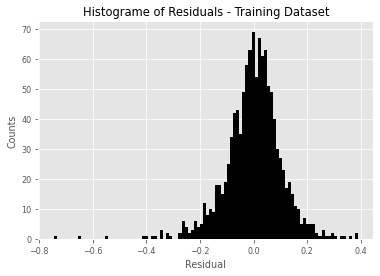

In [55]:
residuals_train = get_residuals(lm_model, X_train_scaled, y_train)
plt.hist(residuals_train, 100, facecolor = 'black');
plt.title('Histograme of Residuals - Training Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Text(0.5, 0, 'Residual')

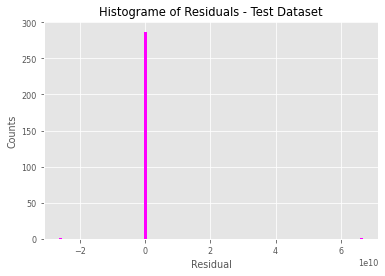

In [56]:
residuals_test = get_residuals(lm_model, X_test_scaled, y_test)
plt.hist(residuals_test, 100, facecolor = 'magenta');
plt.title('Histograme of Residuals - Test Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Linear Regression Model - No Regularization


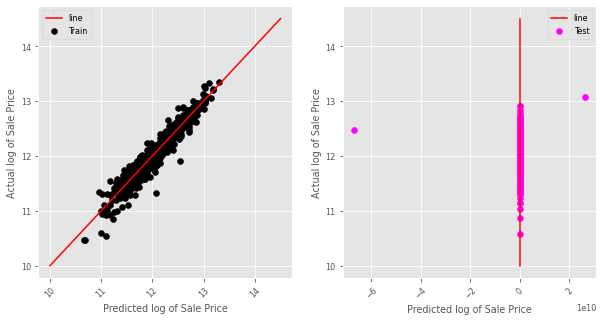

In [57]:
print('Linear Regression Model - No Regularization');
plot_the_model(lm_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [58]:
which_model = 'Linear Regression'
append_myMetrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

## Model 2A: Lasso - No Grid Search 

Identifying a range of lambdas to look at in the following grid search.

In [59]:
from sklearn.linear_model import Lasso
lasso  = Lasso()
lasso.set_params(normalize=False)
lasso_scores_train = []
lasso_scores_test  = []

alphas = np.linspace(0.0001,0.05,100)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train_scaled, y_train)  
        coefs_lasso.append(lasso.coef_)
        
        lasso_scores_train.append(lasso.score(X_train_scaled, y_train))
        lasso_scores_test.append(lasso.score(X_test_scaled, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = PriceFeatures.columns)  
# coefs_lasso.head()

In [60]:
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

lambda =  0.021773737373737376


Text(0, 0.5, '$R^2$')

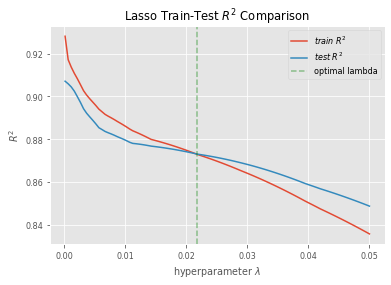

In [61]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')

lasso_underfit = lasso_scores_train < lasso_scores_test
first_underfit  = np.min(alphas[lasso_underfit])
print('lambda = ', first_underfit)
plt.axvline(first_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)

plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

## Model 2B : Lasso - Grid Search

In [62]:
lasso_model = get_lasso_model(X_train_scaled, y_train)

Lasso model object created.
Lasso(alpha=0.001)


In [63]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(lasso_model, X_train_scaled, y_train)

RMSE Logarithmic:  0.1174958736981649
r^2:  0.9142075439820976
RMSE: $ 21072.80603652168


In [64]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(lasso_model, X_test_scaled, y_test)

RMSE Logarithmic:  0.11591096439095132
r^2:  0.9046721768755506
RMSE: $ 18942.961128380997


Text(0.5, 0, 'Residual')

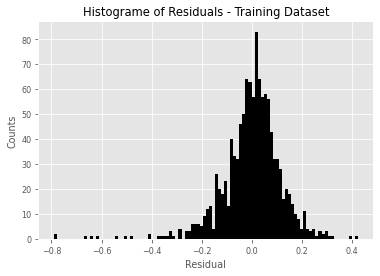

In [65]:
residuals_train = get_residuals(lasso_model, X_train_scaled, y_train)
plt.hist(residuals_train, 100, facecolor = 'black');
plt.title('Histograme of Residuals - Training Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Text(0.5, 0, 'Residual')

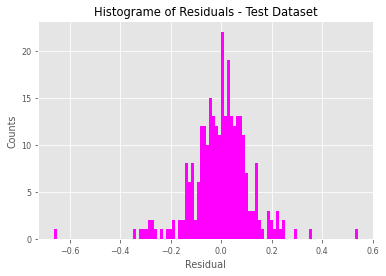

In [66]:
residuals_test = get_residuals(lasso_model, X_test_scaled, y_test)
plt.hist(residuals_test, 100, facecolor = 'magenta');
plt.title('Histograme of Residuals - Test Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Linear Regression Model - Lasso


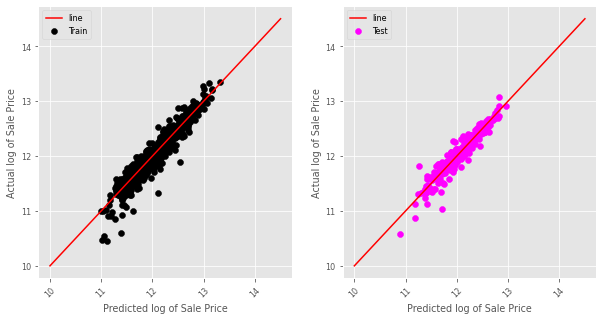

In [67]:
print('Linear Regression Model - Lasso');
plot_the_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [68]:
which_model = 'Lasso'
append_myMetrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

## Model 3 : Ridge - Grid Search

In [69]:
ridge_model = get_ridge_model(X_train_scaled, y_train)

Ridge model object created.
Ridge(alpha=0.01)


In [70]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(ridge_model, X_train_scaled, y_train)

RMSE Logarithmic:  0.10565250611033089
r^2:  0.9306313125837741
RMSE: $ 19509.02433866066


In [71]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(ridge_model, X_test_scaled, y_test)

RMSE Logarithmic:  0.11981467982080138
r^2:  0.8981430423049231
RMSE: $ 18846.047141881136


Text(0.5, 0, 'Residual')

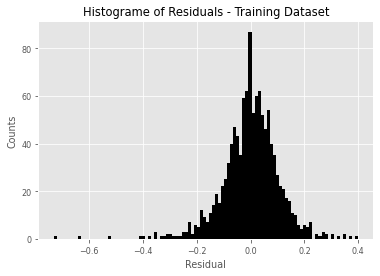

In [72]:
residuals_train = get_residuals(ridge_model, X_train_scaled, y_train)
plt.hist(residuals_train, 100, facecolor = 'black');
plt.title('Histograme of Residuals - Training Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Text(0.5, 0, 'Residual')

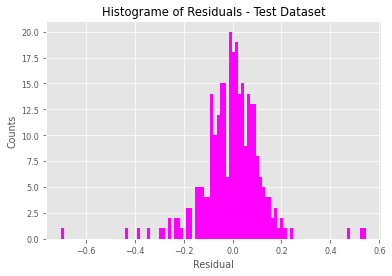

In [73]:
residuals_test = get_residuals(ridge_model, X_test_scaled, y_test)
plt.hist(residuals_test, 100, facecolor = 'magenta');
plt.title('Histograme of Residuals - Test Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Linear Regression Model - Ridge


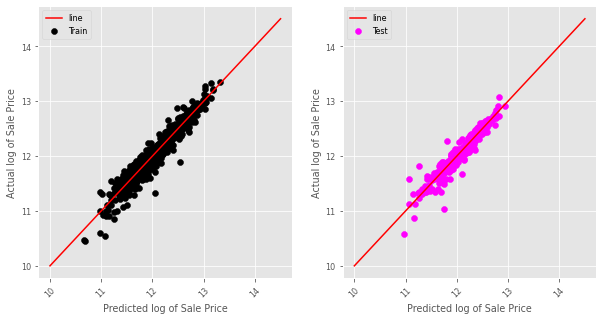

In [74]:
print('Linear Regression Model - Ridge');
plot_the_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [75]:
which_model = 'Ridge'
append_myMetrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

## Model 4 : Elastic Net - Grid Search

In [76]:
EN_model = get_elasticNet_model(X_train_scaled, y_train)

Elastic Net model object created.
ElasticNet(alpha=0.006, l1_ratio=0.1)


In [77]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(EN_model, X_train_scaled, y_train)

RMSE Logarithmic:  0.11616574556928379
r^2:  0.9161389995883805
RMSE: $ 20785.715998707834


In [78]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(EN_model, X_test_scaled, y_test)

RMSE Logarithmic:  0.11555437812183099
r^2:  0.9052578040574
RMSE: $ 19012.83059925184


Text(0.5, 0, 'Residual')

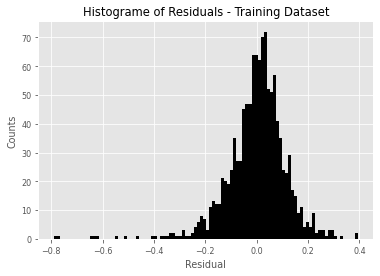

In [79]:
residuals_train = get_residuals(EN_model, X_train_scaled, y_train)
plt.hist(residuals_train, 100, facecolor = 'black');
plt.title('Histograme of Residuals - Training Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Text(0.5, 0, 'Residual')

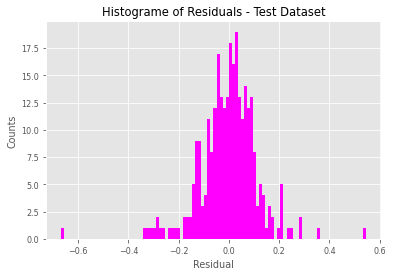

In [80]:
residuals_test = get_residuals(EN_model, X_test_scaled, y_test)
plt.hist(residuals_test, 100, facecolor = 'magenta');
plt.title('Histograme of Residuals - Test Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Linear Regression Model - Elastic Net


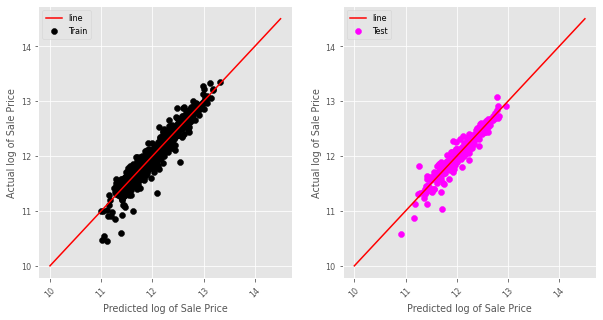

In [81]:
print('Linear Regression Model - Elastic Net');
plot_the_model(EN_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [82]:
which_model = 'Elastic Net'
append_myMetrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

# IV. Compare Model Results

In [83]:
pd.options.display.float_format = '{:,.4f}'.format
zipped = list(zip(model_descrp,
                 rmse_log_train, rmse_log_test, 
                 rmse_dollars_train, rmse_dollars_test,
                 r2_log_train, r2_log_test))

results = pd.DataFrame(zipped, columns=['model',
                                       'rmse log train',
                                       'rmse log test',
                                       'rmse train',
                                       'rmse test',
                                       'r2 train',
                                       'r2 test'])

#results.head(10)
results_sorted = results.sort_values('rmse log test', ascending = True)
results_sorted.head(10)

,model,rmse log train,rmse log test,rmse train,rmse test,r2 train,r2 test
3,Elastic Net,0.1162,0.1156,"20,785.7160","19,012.8306",0.9161,0.9053
1,Lasso,0.1175,0.1159,"21,072.8060","18,942.9611",0.9142,0.9047
2,Ridge,0.1057,0.1198,"19,509.0243","18,846.0471",0.9306,0.8981
0,Linear Regression,0.1063,"1,000.0000","19,620.8484",NaN,0.9298,"-1,000.0000"


In [84]:
#results_sorted.to_csv('./Data/results.csv')

Text(0.5, 0, 'Residual')

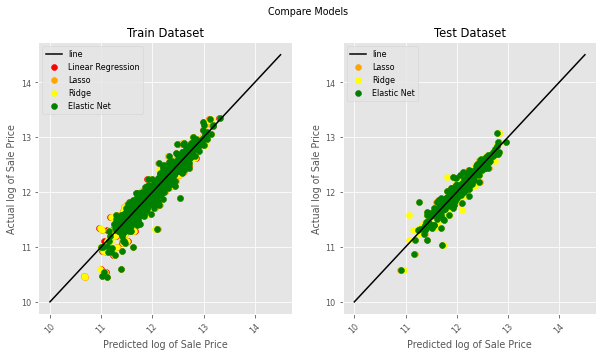

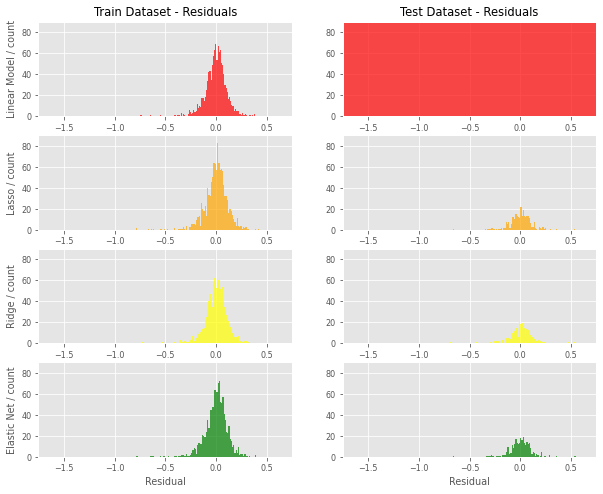

In [85]:
fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[0].plot(x,y, 'k-')
axs[1].plot(x,y, 'k-')

axs[0].scatter(lm_model.predict(X_train_scaled), 
          y_train, color='red')
axs[0].scatter(lasso_model.predict(X_train_scaled), 
          y_train, color='orange')
axs[0].scatter(ridge_model.predict(X_train_scaled), 
          y_train, color='yellow')
axs[0].scatter(EN_model.predict(X_train_scaled), 
          y_train, color='green')
axs[0].set_ylabel('Actual log of Sale Price')
axs[0].set_xlabel('Predicted log of Sale Price')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(['line','Linear Regression','Lasso','Ridge','Elastic Net'])
axs[0].set_title('Train Dataset')

#axs[1].scatter(lm_model.predict(X_test_scaled), 
#          y_test, color='red')
axs[1].scatter(lasso_model.predict(X_test_scaled), 
          y_test, color='orange')
axs[1].scatter(ridge_model.predict(X_test_scaled), 
          y_test, color='yellow')
axs[1].scatter(EN_model.predict(X_test_scaled), 
          y_test, color='green')
axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Lasso','Ridge','Elastic Net'])
axs[1].set_title('Test Dataset')
fig.suptitle('Compare Models');

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
fig, axs = plt.subplots(4,2) 
fig.set_figheight(8)
fig.set_figwidth(10)

axs[0,0].hist(get_residuals(lm_model, X_train_scaled, y_train),
              bins=100, color = 'red', alpha=0.7);
axs[0,0].set_xlim(-1.75,0.75)
axs[0,0].set_ylim(0,90)
axs[0,0].set_ylabel('Linear Model / count')
axs[0,0].set_title('Train Dataset - Residuals')

axs[1,0].hist(get_residuals(lasso_model, X_train_scaled, y_train),
              bins=100, color = 'orange', alpha=0.7);
axs[1,0].set_xlim(-1.75,0.75)
axs[1,0].set_ylim(0,90)
axs[1,0].set_ylabel('Lasso / count')

axs[2,0].hist(get_residuals(ridge_model, X_train_scaled, y_train),
              bins=100, color = 'yellow', alpha=0.7);
axs[2,0].set_xlim(-1.75,0.75)
axs[2,0].set_ylim(0,90)
axs[2,0].set_ylabel('Ridge / count')

axs[3,0].hist(get_residuals(EN_model, X_train_scaled, y_train),
              bins=100, color = 'green', alpha=0.7);
axs[3,0].set_xlim(-1.75,0.75)
axs[3,0].set_ylim(0,90)
axs[3,0].set_ylabel('Elastic Net / count')
axs[3,0].set_xlabel('Residual')

# -------------------------------------------------------------
axs[0,1].hist(get_residuals(lm_model, X_test_scaled, y_test),
              bins=100, color = 'red', alpha=0.7);
axs[0,1].set_xlim(-1.75,0.75)
axs[0,1].set_ylim(0,90)
axs[0,1].set_title('Test Dataset - Residuals')

axs[1,1].hist(get_residuals(lasso_model, X_test_scaled, y_test),
              bins=100, color = 'orange', alpha=0.7);
axs[1,1].set_xlim(-1.75,0.75)
axs[1,1].set_ylim(0,90)

axs[2,1].hist(get_residuals(ridge_model, X_test_scaled, y_test),
              bins=100, color = 'yellow', alpha=0.7);
axs[2,1].set_xlim(-1.75,0.75)
axs[2,1].set_ylim(0,90)

axs[3,1].hist(get_residuals(EN_model, X_test_scaled, y_test),
              bins=100, color = 'green', alpha=0.7);
axs[3,1].set_xlim(-1.75,0.75)
axs[3,1].set_ylim(0,90)
axs[3,1].set_xlabel('Residual')

# V. Dig into Elastic Net Model

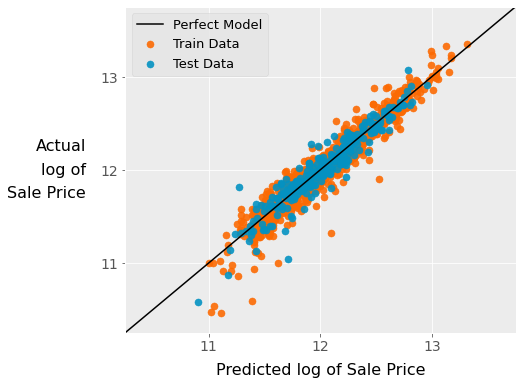

In [86]:
# Figure 9 in write-up
fig = plt.figure(figsize = (7,6))
axs = plt.axes() 

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs.plot(x,y, '-',color="black")

axs.scatter(EN_model.predict(X_train_scaled), 
          y_train, color='#FC6A03',s=50,alpha=0.90)
axs.scatter(EN_model.predict(X_test_scaled), 
          y_test, color='#0492C2',s=50,alpha=0.90)

axs.legend(['Perfect Model','Train Data','Test Data'],fontsize=13)

axs.set_ylabel(' ',fontsize=20)
axs.text(12,9.80,'Predicted log of Sale Price',ha = 'center',
         fontsize=16,color='black',
         rotation=0) 
axs.set_xlabel(' ',fontsize=20)
axs.text(9.9,12.25,'Actual',ha = 'right',va='center',
         fontsize=16,color='black',
         rotation=0)
axs.text(9.9,12.00,'log of',ha = 'right',va='center',
         fontsize=16,color='black',
         rotation=0)
axs.text(9.9,11.75,'Sale Price',ha = 'right',va='center',
         fontsize=16,color='black',
         rotation=0)

axs.tick_params(axis='x', rotation=0)
axs.set_ylim(10.25,13.75)
axs.set_xlim(10.25,13.75)
axs.set_xticks([11,12,13])
axs.set_yticks([11,12,13])

axs.tick_params(axis='both',labelsize=14)
axs.set_facecolor('#ECECEC')


In [87]:
EN_model.get_params

<bound method BaseEstimator.get_params of ElasticNet(alpha=0.006, l1_ratio=0.1)>

In [88]:
EN_model.intercept_

11.83167726469943

In [89]:
coefs = pd.DataFrame(
    EN_model.coef_,
    columns=["Coefficients"],
    index=PriceFeatures.columns,
)
coefs.head()

,Coefficients
LotFrontage,0.0106
LotArea,0.0137
OverallQual,0.0905
MasVnrArea,0.0009
BsmtFinSF1,0.0228


In [90]:
coefs.head(25)

,Coefficients
LotFrontage,0.0106
LotArea,0.0137
OverallQual,0.0905
MasVnrArea,0.0009
BsmtFinSF1,0.0228
BsmtUnfSF,-0.0078
TotalBsmtSF,0.0479
1stFlrSF,0.0215
2ndFlrSF,0.0377
GrLivArea,0.0717


                           Coefficients  RespVar_Prct_Change  Magnitude
CentralAir_Y                     0.0958               9.5831     9.5831
Neighborhood_Grp_affluent        0.0916               9.1605     9.1605
OverallQual                      9.4716               9.0495     9.0495
GrLivArea                        7.4323               7.1691     7.1691
TotalBsmtSF                      4.9034               4.7870     4.7870
MSZoning_RL                      0.0478               4.7761     4.7761
SaleType_New                     0.0436               4.3621     4.3621
KitchenQual_Ex                   0.0383               3.8301     3.8301
BsmtExposure_Gd                  0.0377               3.7722     3.7722
2ndFlrSF                         3.8392               3.7673     3.7673
Exterior1st_BrkFace              0.0317               3.1738     3.1738
SaleCondition_Normal             0.0250               2.5027     2.5027
BsmtFinSF1                       2.3075               2.2812    

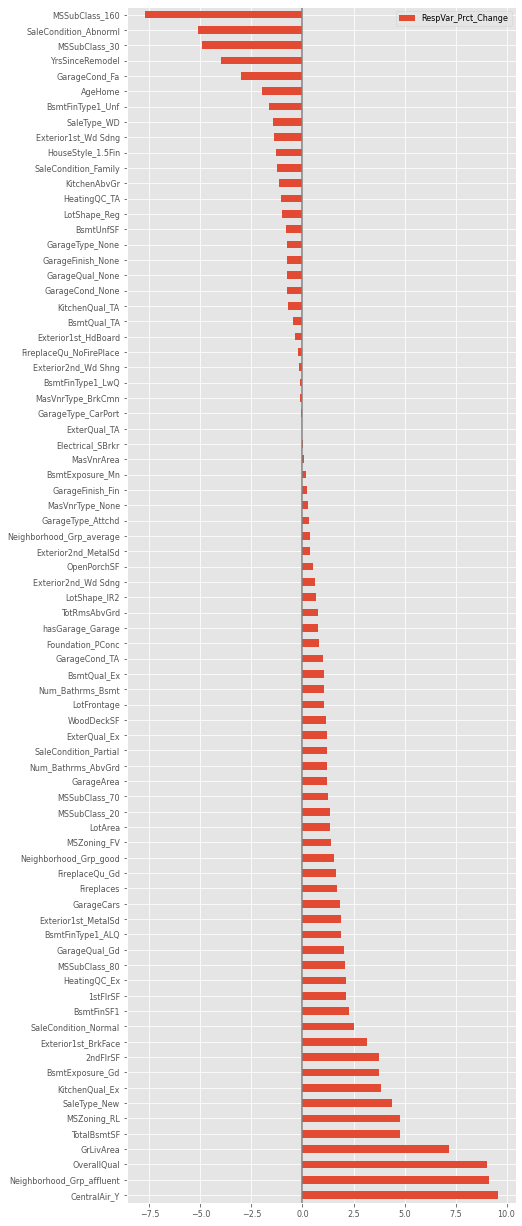

In [91]:
# place holder, also correct for the Dummy Variables
coefs['RespVar_Prct_Change'] = coefs['Coefficients']*100 

# Numerical Variables
coefs.iloc[num_indx,0] = (np.exp(coefs.iloc[num_indx,0])-1)*100

coefs['Magnitude'] = abs(coefs['RespVar_Prct_Change'])
coefs_sorted = coefs.sort_values('RespVar_Prct_Change', ascending = False)
coefs_sorted_nonzero = coefs_sorted.loc[coefs_sorted['Magnitude']>0]
print(coefs_sorted.head(50))

coefs_sorted_nonzero = coefs_sorted_nonzero.drop('Magnitude', axis=1)
coefs_sorted_nonzero = coefs_sorted_nonzero.drop('Coefficients', axis=1)

coefs_sorted_nonzero.plot(kind="barh", figsize=(9, 22))
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [92]:
#coefs_sorted_nonzero.to_csv('./Data/coef_new.csv')

In [93]:
coefs_reset = coefs.reset_index()
coefs_reset.head()

,index,Coefficients,RespVar_Prct_Change,Magnitude
0,LotFrontage,1.0660,1.0604,1.0604
1,LotArea,1.3755,1.3661,1.3661
2,OverallQual,9.4716,9.0495,9.0495
3,MasVnrArea,0.0934,0.0933,0.0933
4,BsmtFinSF1,2.3075,2.2812,2.2812


                         index  Coefficients  RespVar_Prct_Change  Magnitude
18                     AgeHome       -1.9455              -1.9647     1.9647
107           BsmtFinType1_Unf       -0.0166              -1.6625     1.6625
66         Exterior1st_Wd Sdng       -0.0142              -1.4152     1.4152
111               HeatingQC_TA       -0.0104              -1.0378     1.0378
86                ExterQual_Ex        0.0118               1.1833     1.1833
159      Neighborhood_Grp_good        0.0154               1.5411     1.5411
62         Exterior1st_MetalSd        0.0188               1.8817     1.8817
102           BsmtFinType1_ALQ        0.0191               1.9082     1.9082
108               HeatingQC_Ex        0.0213               2.1328     2.1328
4                   BsmtFinSF1        2.3075               2.2812     2.2812
57         Exterior1st_BrkFace        0.0317               3.1738     3.1738
117             KitchenQual_Ex        0.0383               3.8301     3.8301

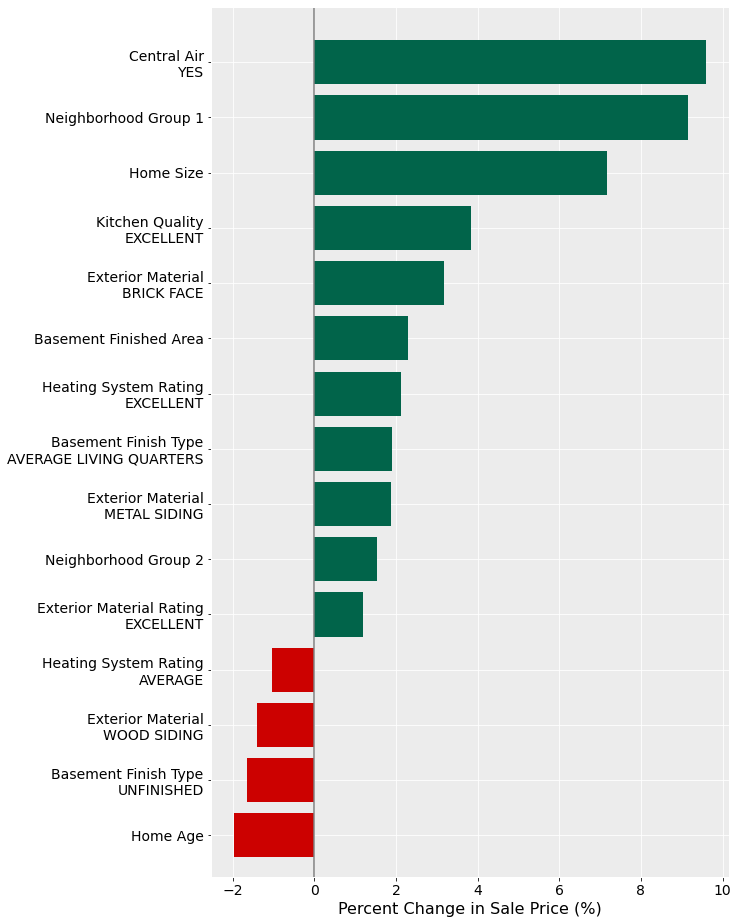

In [94]:
which_features = ['AgeHome',
                  'BsmtFinType1_Unf', 
                  'Exterior1st_Wd Sdng',
                  'HeatingQC_TA',
                  'ExterQual_Ex',
                  'Neighborhood_Grp_good',
                  'Exterior1st_MetalSd',
                  'BsmtFinType1_ALQ',
                  'HeatingQC_Ex',
                  'BsmtFinSF1',
                  'Exterior1st_BrkFace',
                  'KitchenQual_Ex',
                  'GrLivArea',
                  'Neighborhood_Grp_affluent',
                  'CentralAir_Y'] 

coefs_loc = coefs_reset[coefs_reset['index'].isin(which_features)].sort_values('RespVar_Prct_Change', ascending = True)
print(coefs_loc)
coefs_loc = coefs_loc.drop('Magnitude', axis=1)
coefs_loc = coefs_loc.drop('Coefficients', axis=1)

fig = plt.figure(figsize = (10,8))
ax = plt.axes() 

y_ticks_labels0 = ['Home Age',
                  'Basement Finish Type\nUNFINISHED', 
                  'Exterior Material\nWOOD SIDING',
                  'Heating System Rating\nAVERAGE',
                  'Exterior Material Rating\nEXCELLENT',
                  'Neighborhood Group 2',
                  'Exterior Material\nMETAL SIDING',
                  'Basement Finish Type\nAVERAGE LIVING QUARTERS',
                  'Heating System Rating\nEXCELLENT',
                  'Basement Finished Area',
                  'Exterior Material\nBRICK FACE',
                  'Kitchen Quality\nEXCELLENT',
                  'Home Size',
                  'Neighborhood Group 1',
                  'Central Air\nYES']

clrs = ['#01644a' if (x > 0) else '#cc0100' for x in coefs_loc['RespVar_Prct_Change']]

plt.barh(list(range(1, len(which_features)+1)),coefs_loc['RespVar_Prct_Change'],color=clrs)
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
ax.set_yticks([0,len(which_features)])
ax.set_yticks(list(range(1, len(which_features)+1)))
#ax.set_yticklabels(which_features, rotation=0)
ax.set_xlabel('Percent Change in Sale Price (%)', fontsize=16, color = 'black')
ax.set_yticklabels(y_ticks_labels0, rotation=0, fontsize=100)
ax.tick_params(axis='both',labelsize=14)

ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='x', colors='black')
ax.set_ylim(0.25,len(which_features)+1)
ax.set_facecolor('#ECECEC')

#plt.xticks(fontsize=12)
fig.set_figheight(16)
fig.set_figwidth(12)